In [1]:
# First install Miniconda to install RDKIT in colab 

In [2]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local


--2021-11-23 13:42:41--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   105MB/s    in 0.8s    

2021-11-23 13:42:42 (105 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::chardet==3.0.4=py37_1003
  - defaults/linux-64::yaml==0.1.7=had09818_2
  - defaults/linux-64::ncurses==6.2=he6710b0_0
  - defaults/linux-64::six==1.14.

In [3]:
! conda install -c rdkit rdkit -y

Solving environment: / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be UPDATED:

  ca-certificates                                2020.1.1-0 --> 2021.10.26-h06a4308_2


Preparing transaction: \ done
Verifying transaction: / done
Executing transaction: \ done


In [4]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [5]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [6]:
# from drugbank
import requests
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import DataStructs
import numpy as np


IPythonConsole.ipython_useSVG=True  

In [7]:
similes_list = ['C(C(=O)O)N','N[C@@H](CC1=CC=CC=C1)C(O)=O','O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S']
mol_list = []

In [8]:
for sml in similes_list:
  mol = Chem.MolFromSmiles(sml)
  mol_list.append(mol)

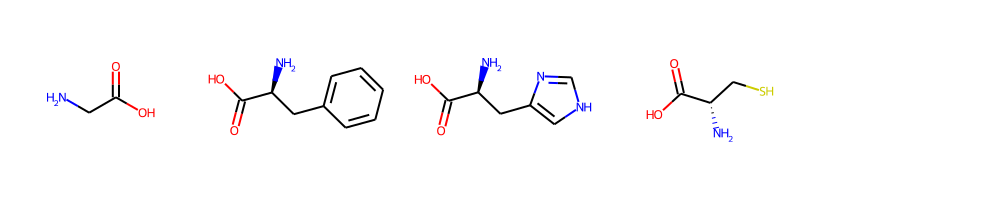

In [9]:
img = Draw.MolsToGridImage(mol_list,molsPerRow=5)
img

In [10]:
#  function to search pattern in a mol list
def match(mol_list,pattern):
  for mol in mol_list:
    print("")
    print(mol.HasSubstructMatch(pattern))

In [11]:
pattern1 = Chem.MolFromSmiles('S')
pattern2 = Chem.MolFromSmiles('C(=O)O')
pattern3 = Chem.MolFromSmiles('CC(N)C')


In [12]:
match(mol_list,pattern1)



False

False

False

True


In [13]:
match(mol_list,pattern2)



True

True

True

True


In [14]:
match(mol_list,pattern3)


False

True

True

True


In [15]:
# to find ring
pattern4 = Chem.MolFromSmarts('[r]')
# to find ring with corner
pattern5 = Chem.MolFromSmarts('[r5]')


In [16]:
match(mol_list,pattern4)



False

True

True

False


In [17]:
match(mol_list,pattern5)


False

False

True

False


## **fingerprint **

A unique pattern indicating the presence of a particular molecule, based on specialized analytic techniques such as mass- or x-ray-spectroscopy, used to identify a pollutant, drug, contaminant, or other chemical in a test sample.

In [18]:
glycine=mol_list[0]

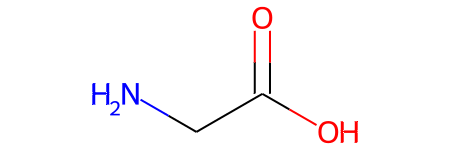

In [19]:
glycine

In [20]:
fp = AllChem.GetMorganFingerprintAsBitVect(glycine,2,nBits=1024)
fp_arr = np.zeros((1,))


In [21]:
# to see fp first converted to np arrays

In [22]:
DataStructs.ConvertToNumpyArray(fp,fp_arr)

In [23]:
# mostly zeros
fp_arr

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
# find non zeros
np.nonzero(fp_arr)
# here we are getting the location of the 1s in the fp_arr

(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)

In [25]:
fp_arr[27]

1.0

In [30]:
 bi={}

In [26]:
# As the previous section of Fp is a lil bit abstract 
# here we are using dictionary and  bitInfo
def fingerPrint_bits(mol):
  bi={}
  fp = AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024,bitInfo=bi)
  fp_arr = np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp,fp_arr)
  return list(fp.GetOnBits())

In [27]:
def fingerPrint(mol):
 
  fp = AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024,bitInfo=bi)
  return fp 

In [39]:
fingerPrint(glycine)

In [43]:
bi={}
fp = AllChem.GetMorganFingerprintAsBitVect(glycine,2,nBits=1024,bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)

In [44]:
prints= [(glycine,x,bi) for x in fp.GetOnBits()]
prints

[(<rdkit.Chem.rdchem.Mol at 0x7fbcac6992b0>,
  27,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x7fbcac6992b0>,
  80,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x7fbcac6992b0>,
  147,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x7fbcac6992b0>,
  389,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdk

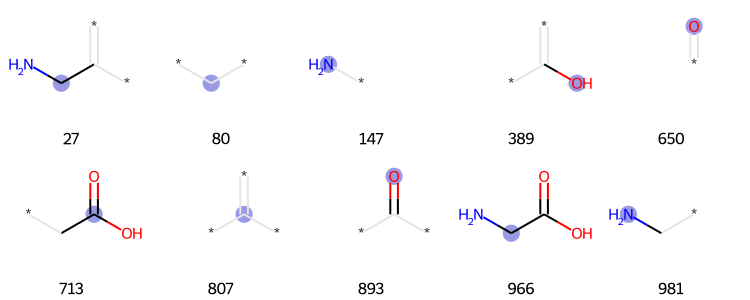

In [45]:
# now to draw
# Morganbits takes an dictionary as input
Draw.DrawMorganBits(prints,molsPerRow=5,legends =[str(x)  for x in fingerPrint(glycine).GetOnBits()])

In [46]:
cysteine = mol_list[3]
img = Draw.MolsToGridImage([glycine,cysteine],molsPerRow=5)

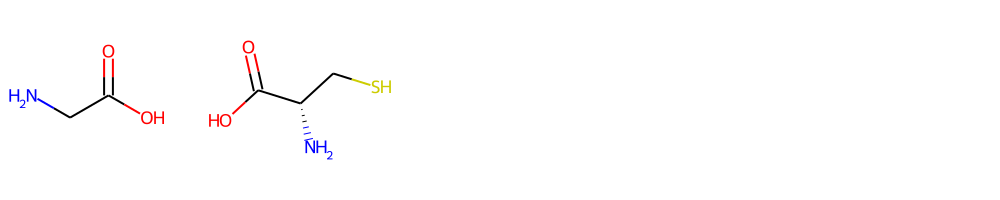

In [47]:
img

In [48]:
print('cycteine',fingerPrint_bits(cysteine))
print('glycine',fingerPrint_bits(glycine))

cycteine [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
glycine [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]


In [49]:
# Common 
common = set(fingerPrint_bits(cysteine)) & set(fingerPrint_bits(glycine))
# Union
combined = set(fingerPrint_bits(cysteine)) | set(fingerPrint_bits(glycine))

In [50]:
print('Common',common)
print('combined',combined)




Common {389, 807, 650, 80, 147, 893}
combined {1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}


In [51]:
# check similarity
similarity = len(common)/len(combined)
print('similarity',similarity)

similarity 0.3


In [52]:
# built in function for similarity
print(DataStructs.TanimotoSimilarity(fingerPrint(cysteine),fingerPrint(glycine)))

0.3
